In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', category=FutureWarning)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [2]:
train_df=pd.read_csv(r"C:\Users\user\Downloads\train.csv")
test_df=pd.read_csv(r"C:\Users\user\Downloads\test.csv")

In [3]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
train_df.shape

(137, 43)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [6]:
train_df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'], dtype='object')

In [7]:
train_df.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [8]:
train_df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [9]:
train_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [10]:
train_df.drop("Id",axis=1,inplace=True)
test_df.drop("Id",axis=1,inplace=True)

In [11]:
#There is no missing value
#Target value is "revenue"
#Id value is unnecessary

In [12]:
train_df["Open Date"]=pd.to_datetime(train_df["Open Date"])
test_df["Open Date"]=pd.to_datetime(test_df["Open Date"])

In [13]:
train_df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [14]:
train_df["City Group"].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [15]:
train_df["Type"].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [16]:
#Seperate categorical from numberical variables for analysis
num_features=[col for col in train_df.columns if train_df[col].dtypes in["int64","float64"]]
train_df[num_features].head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [17]:
cat_cols=[col for col in train_df.columns if train_df[col].dtypes in ["object"]]
train_df[cat_cols].head()

,City,City Group,Type
0,İstanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakır,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL


Text(0.5, 1.0, 'Distribution of Target Variable')

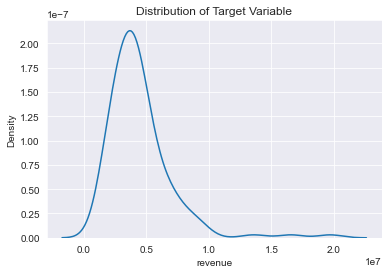

In [31]:
sns.distplot(train_df["revenue"],hist=False)
plt.title("Distribution of Target Variable")

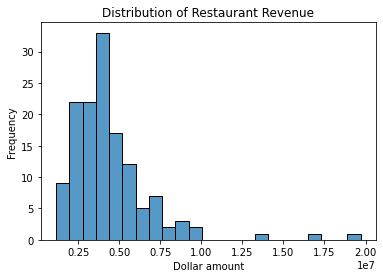

In [19]:
sns.histplot(train_df["revenue"])
plt.xlabel("Dollar amount")
plt.ylabel("Frequency")
plt.title("Distribution of Restaurant Revenue")
plt.show()

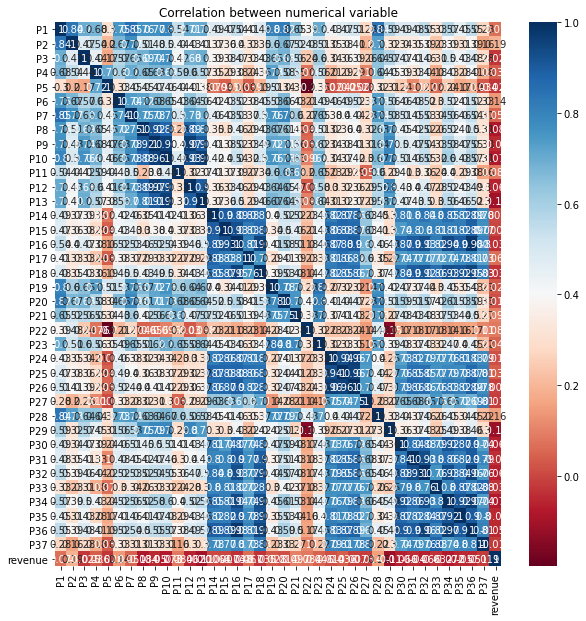

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True,cmap="RdBu")
plt.title("Correlation between numerical variable")
plt.show()

In [21]:
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

In [22]:
def summary(dataframe,col,plot=False):
    if plot:
        plt.figure(figsize=(5,5))
        sns.set_style('darkgrid')
        g2 = sns.countplot(dataframe[col],palette="Set2")
        plt.show(block=True)

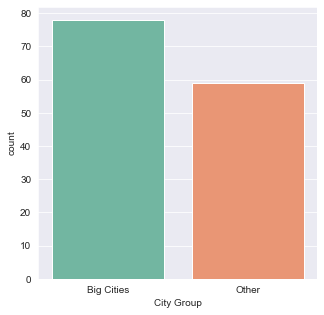

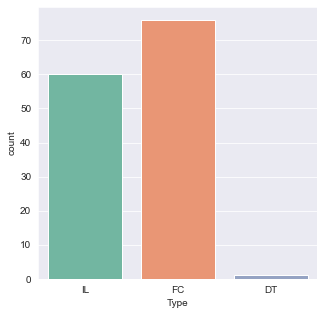

In [23]:
for i in train_df.columns:
    if i in ["City Group","Type"]:
        summary(train_df,i,plot=True)

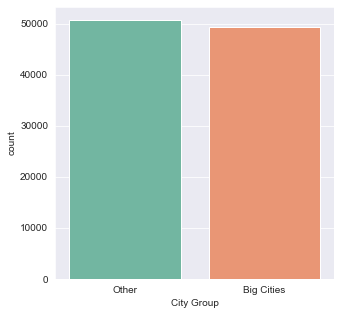

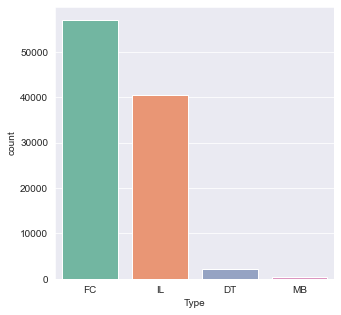

In [24]:
for i in test_df.columns:
    if i in ["City Group","Type"]:
        summary(test_df,i,plot=True)

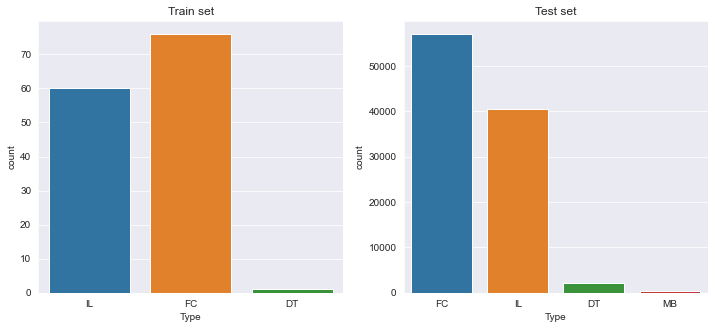

In [25]:
#OR

fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(train_df["Type"],ax=ax[0])
ax[0].set_title("Train set")
sns.countplot(test_df["Type"],ax=ax[1])
ax[1].set_title("Test set")
plt.show()

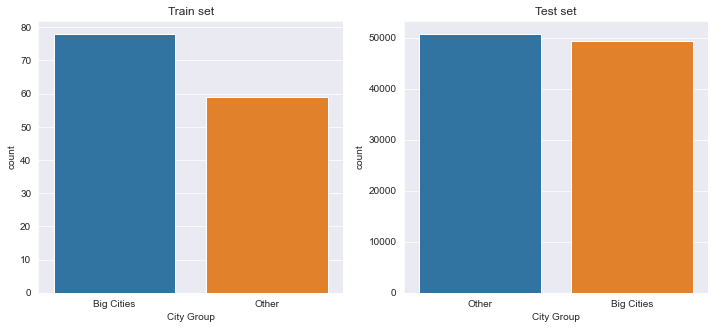

In [26]:
#OR

fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(train_df["City Group"],ax=ax[0])
ax[0].set_title("Train set")
sns.countplot(test_df["City Group"],ax=ax[1])
ax[1].set_title("Test set")
plt.show()

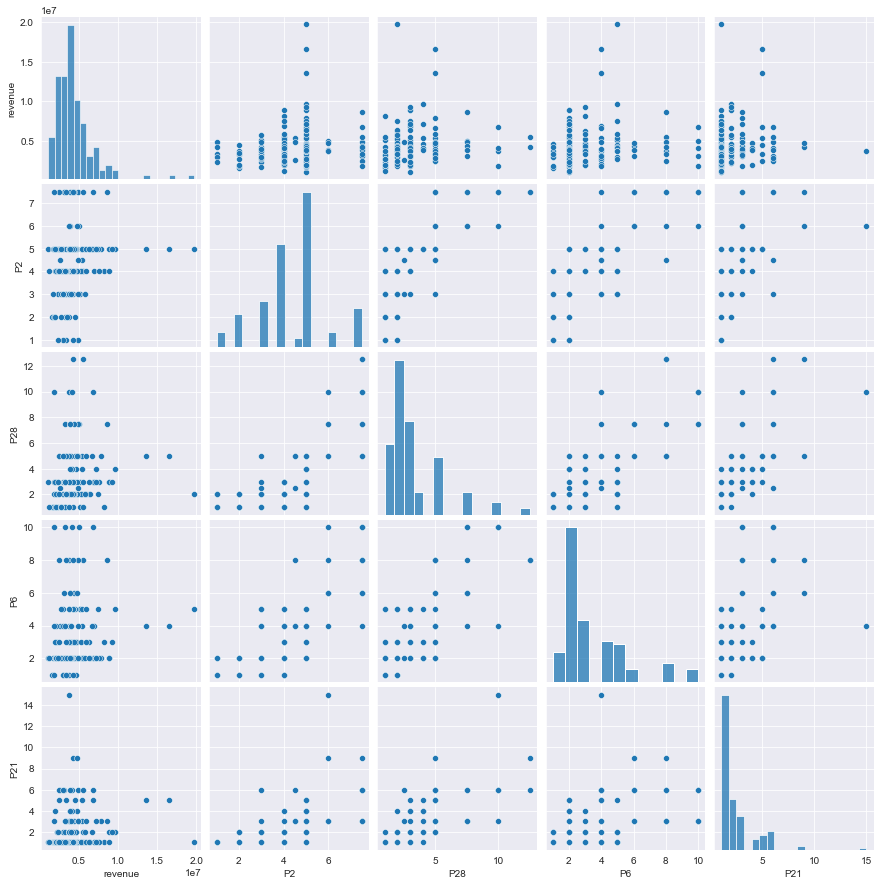

In [27]:
sns.pairplot(train_df[train_df.corr()["revenue"].sort_values(ascending=False).index[:5]])
plt.show()

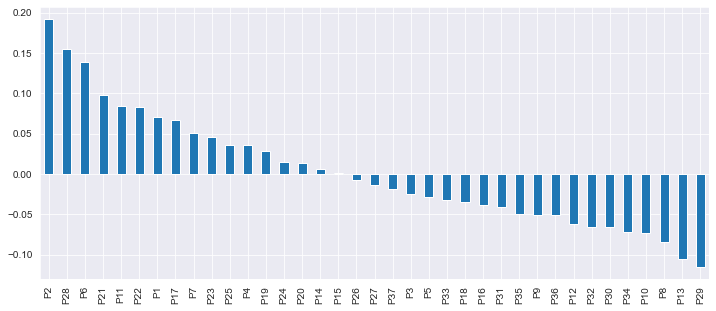

In [28]:
corr_with_revenue=train_df.drop(["City Group","Type"],axis=1).corr()["revenue"].sort_values(ascending=False)
plt.figure(figsize=(12,5))
corr_with_revenue.drop("revenue").plot.bar()
plt.show()

In [33]:
def datetime_encoding(df, cols):
    for c in cols:
        df[c+'_month'] = pd.DatetimeIndex(df[c]).month
        df[c+'_month'] = df[c+'_month'].astype("category").cat.codes
        
        df[c+'_year'] = pd.DatetimeIndex(df[c]).year
        df[c+'_year'] = df[c+'_year'].astype("category").cat.codes

    return df
df = datetime_encoding(train_df, cols=['Open Date'])
train_df.drop("Open Date",axis=1,inplace=True)
train_df.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Date_month,Open Date_year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,6,3
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,1,10
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2,15
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,1,14
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,4,11


<AxesSubplot:xlabel='Open Date_month', ylabel='count'>

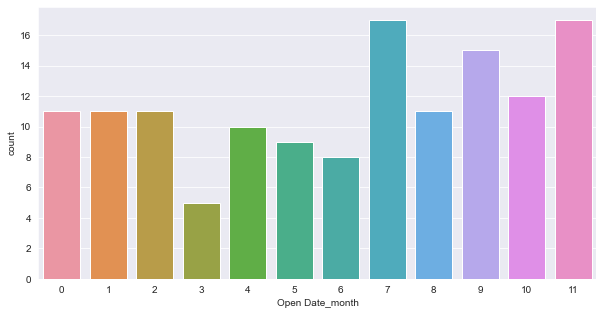

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(train_df["Open Date_month"])

<AxesSubplot:xlabel='Open Date_year', ylabel='count'>

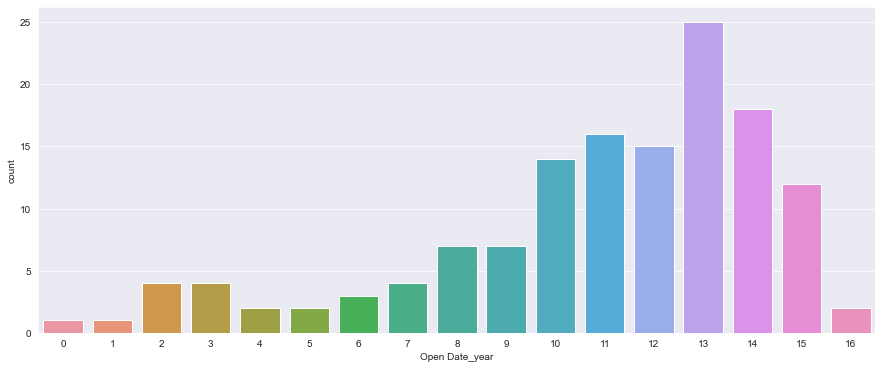

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(train_df["Open Date_year"])

In [36]:
#There are 63 different City values. I can create dummy variables to handle this feature but it will lead to so many columns

In [37]:
train_df.drop("City",axis=1,inplace=True)

In [38]:
train_df.groupby("Open Date_month")["revenue"].mean()

Open Date_month
0     5.900851e+06
1     4.189109e+06
2     3.969557e+06
3     4.726097e+06
4     3.657800e+06
5     3.776214e+06
6     3.458596e+06
7     3.883020e+06
8     5.390856e+06
9     5.236838e+06
10    4.721400e+06
11    4.299763e+06
Name: revenue, dtype: float64

In [39]:
train_df.groupby("Open Date_year")["revenue"].mean()

Open Date_year
0     3.903884e+06
1     4.286645e+06
2     4.251905e+06
3     7.329030e+06
4     1.359602e+07
5     4.991022e+06
6     3.482435e+06
7     6.611118e+06
8     4.203972e+06
9     5.079333e+06
10    4.876962e+06
11    4.652457e+06
12    4.383878e+06
13    4.147879e+06
14    3.837859e+06
15    2.532287e+06
16    2.464944e+06
Name: revenue, dtype: float64

In [40]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
l=[i for i in train_df.columns if train_df[i].dtypes=="object"]
for i in l:
    train_df[i]=label_encoder.fit_transform(train_df[i])

In [41]:
train_df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Date_month,Open Date_year
0,0,2,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,6,3
1,0,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,1,10
2,1,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2,15
3,1,2,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,1,14
4,1,2,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,4,11


In [42]:
train_df.drop_duplicates(keep='first', inplace=True)

In [43]:
train_df.shape

(137, 42)

In [44]:
X=train_df.drop(["revenue"],axis=1)
y=train_df["revenue"]

In [45]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=46)
print("X-Train :",X_train.shape)
print("X-Test :",X_test.shape)
print("Y-Train :",y_test.shape)
print("Y-Test :",y_test.shape)

X-Train : (109, 41)
X-Test : (28, 41)
Y-Train : (28,)
Y-Test : (28,)


In [47]:
xgbr_model=XGBRegressor().fit(X,y)
y_pred=xgbr_model.predict(X_test)
y_pred

array([3752893. , 4651821.5, 4554242.5, 2018785.8, 3258941.8, 8904072. ,
       4264166. , 3745120.8, 2021983.6, 2992917.5, 3272996. , 4219290. ,
       2364488. , 5435277. , 4758447.5, 5161354. , 3807469.2, 2740678.8,
       4807811. , 3836723.5, 9262685. , 3218930. , 2371216.2, 4888779. ,
       7495522.5, 2083426. , 3570394.2, 4263648.5], dtype=float32)

In [48]:
def evaluation(y,predict):
    mae=mean_absolute_error(y, predict)
    mse=mean_squared_error(y,predict)
    r_squared=r2_score(y,predict)
    return mae,mse,r_squared

In [49]:
mae, mse, r_squared=evaluation(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
print('RMSE:',np.sqrt(mse))

Mean Absolute Error: 43.013392857142854
Mean Squared Error: 8540.618861607143
R-squared: 0.9999999973616559
RMSE: 92.41546873552686


In [50]:
rd_model=RandomForestRegressor().fit(X,y)
y_pred=rd_model.predict(X_test)
y_pred

array([4183137.07, 5255504.77, 5232639.69, 3195642.22, 3826073.77,
       7477330.33, 4141768.05, 3715625.38, 2822790.58, 2862733.21,
       3534218.72, 4697048.27, 2865463.74, 5666522.27, 4695047.33,
       5141127.58, 3615544.64, 3387943.64, 4945100.29, 4186259.68,
       7889807.43, 3553327.69, 2442693.04, 4592707.88, 8625432.11,
       2736389.39, 3304504.51, 3987840.56])

In [51]:
mae, mse, r_squared=evaluation(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
print('RMSE:',np.sqrt(mse))

Mean Absolute Error: 473110.3585714285
Mean Squared Error: 377459634149.69385
R-squared: 0.8833962257582927
RMSE: 614377.4362309327


In [52]:
rd_model.score(X,y)

0.8593778216871624

# TEST

In [53]:
test=pd.read_csv(r"C:\Users\user\Downloads\test.csv")
test.drop("City",axis=1,inplace=True)
l=[i for i in test.columns if test[i].dtypes=="object"]
for i in l:
    test[i]=label_encoder.fit_transform(test[i])

In [54]:
test.head()

,Id,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,12,1,1,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,54,1,2,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,247,0,1,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,100,1,2,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,161,1,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [73]:
pred=test.drop("Id",axis=1)
y_pred=xgbr_model.predict(X)
y1=pd.DataFrame(y_pred)

In [65]:
test=pd.concat([test,y1],axis=1)

In [69]:
test.columns=[   'Id', "Open Date",   'City Group', "Type",      'P1',      'P2',      'P3',      'P4',
            'P5',      'P6',      'P7',      'P8',      'P9',     'P10',
           'P11',     'P12',     'P13',     'P14',     'P15',     'P16',
           'P17',     'P18',     'P19',     'P20',     'P21',     'P22',
           'P23',     'P24',     'P25',     'P26',     'P27',     'P28',
           'P29',     'P30',     'P31',     'P32',     'P33',     'P34',
           'P35',     'P36',     'P37', 'revenue',   'Prediction']

In [70]:
test.to_csv("sub.csv",columns=["Id","Prediction"],index=False)

In [55]:
sample=pd.read_csv(r"C:\Users\user\Downloads\sampleSubmission.csv")
sample.head()

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6
3,3,4453532.6
4,4,4453532.6


In [71]:
sample1=pd.read_csv("sub.csv")
sample1.head()

,Id,Prediction
0,0,5653764.0
1,1,6923100.0
2,2,2055346.6
3,3,2675511.2
4,4,4316718.0
